# Ford GoBike Exploration
## by Truc Bui

## Investigation Overview

> The goal of this presentation is to analyse which features can be used to predict bikeshare trip duration. The elements to be examined are: days of week, period of day, user types, age and member genders. 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df1= pd.read_csv('data_clean.csv')
df1.head()

,duration_sec,start_day,period_of_day,user_type,age,member_gender
0,52185,Thu,Afternoon,Customer,36,Male
1,42521,Thu,Afternoon,Customer,35,NaN
2,61854,Thu,Morning,Customer,48,Male
3,36490,Thu,Afternoon,Subscriber,31,Other
4,1585,Thu,Evening,Subscriber,46,Male


## Distribution of Trip Duration

> When plotted on a log-scale, this distribution looks roundly bimodal, with one peak around 600 seconds. Number of trips increase with the increasing in duration until the duration reach 600 seconds. After that, number of trips decline as duration increasing.

Text(0.5, 1.0, 'Distribution of Trip Duration')

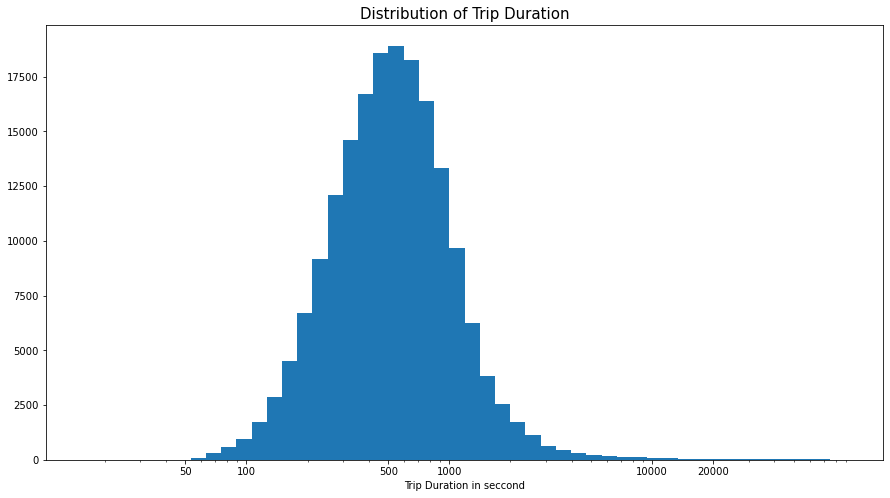

In [3]:
log_binsize = 0.075
bins = 10 ** np.arange(1.2, np.log10(df1['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 8])
plt.hist(data = df1, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50,100,500, 1000,10000, 20000], [50,100,500,1000,10000,20000])
plt.xlabel('Trip Duration in seccond')
plt.title('Distribution of Trip Duration', fontsize = 15)

## Relationship between age and trip duration as regards to each user type

> Higher duration has been done by young members aged between 25-40yo. There is no significant difference between two user types as people who ride longer are younger people.

Text(0.5, 1.0, 'Relationship between age and trip duration as regards to each user type')

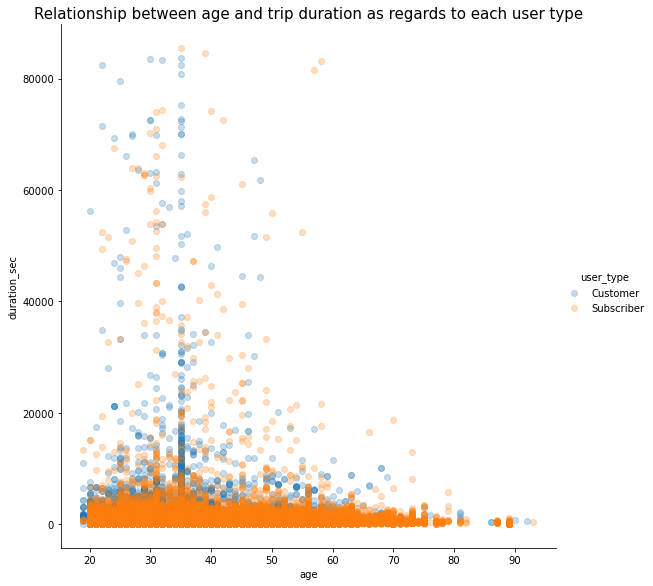

In [4]:
g = sb.FacetGrid(data = df1, hue = 'user_type', size = 8)
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
g.add_legend()
plt.title('Relationship between age and trip duration as regards to each user type', fontsize=15)

## Relationship between age and trip duration as regards to each gender

 > There is no significant difference between genders as people who ride longer are younger people. However, male users group contain more older people (age around 65-75yo)who take longer trips.Few females who aged around 55yo ride with very long duration.


Text(0.5, 1.0, 'Relationship between age and trip duration as regards to each gender')

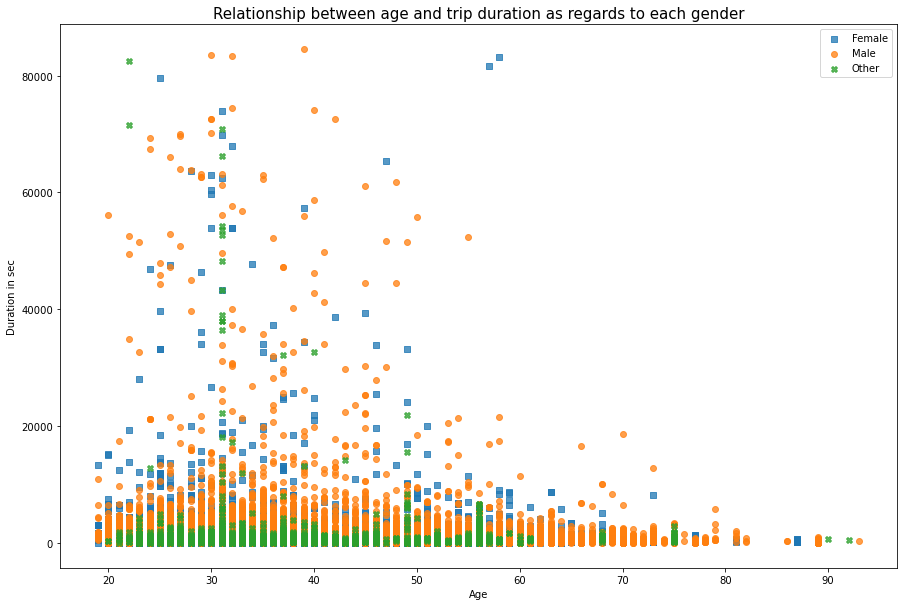

In [5]:
markers = [['Female', 's'],['Male', 'o'], ['Other', 'X']]

plt.figure(figsize = [15, 10])
for x,y in markers:
    df1_type = df1[df1['member_gender'] == x]
    plt.scatter(df1_type['age'], df1_type['duration_sec'], marker=y, alpha=0.75)

plt.legend(['Female','Male','Other'])
plt.xlabel('Age')
plt.ylabel('Duration in sec')
plt.title('Relationship between age and trip duration as regards to each gender',fontsize=15)

## Trip Duration Across days and periods in day

>  People tend to ride most in the afternoon in all week days. In weekend, the average trip duration is higher than week days because people have more time to enjoy the trip.

Text(0, 0.5, 'Duration in second')

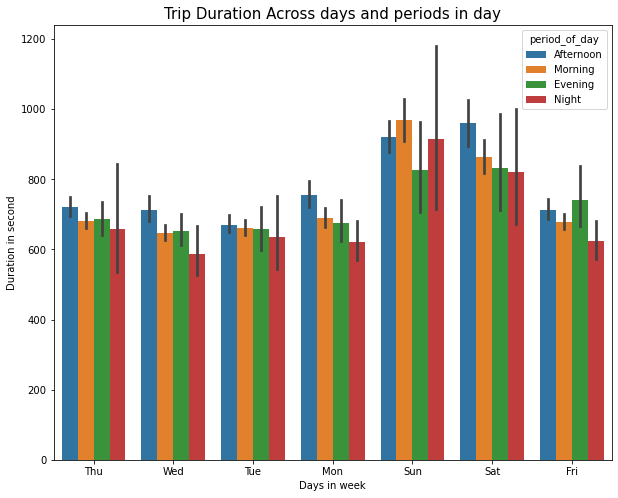

In [6]:
plt.figure(figsize = [10, 8])

c = sb.barplot(x='start_day', y = 'duration_sec', hue='period_of_day', data=df1)
plt.title('Trip Duration Across days and periods in day', fontsize=15)
plt.xlabel('Days in week')
plt.ylabel('Duration in second')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [1]:
!jupyter nbconvert slide_deck_fordgobike.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_fordgobike.ipynb to slides
[NbConvertApp] Writing 777718 bytes to slide_deck_fordgobike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/trucbui/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/trucbui/opt/anaconda3/lib/python3.7/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/trucbui/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/trucbui/opt/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/Users/trucbui/opt/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 524, in convert_notebooks
    self